## Lab 6: Do Babies Understand Probability?

Welcome to Lab 6!

After such an extensive introduction to programming for data science, we are finally moving into the section of the course where we can apply our new skils to answer real questions.   

In [2]:
# Run this cell, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import * 

# These lines do some fancy plotting magic
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

### The Origins of Probabilistic Inference in Human Infants.

    Denison, S., & Xu, F. (2014). The origins of probabilistic inference in human infants. Cognition, 130(3), 335–347. https://doi.org/10.1016/j.cognition.2013.12.001

Reasoning under uncertainty is the bread and butter of everyday life. Many areas of psychology, from cognitive, developmental, social, to clinical, are interested in how individuals make inferences and decisions with incomplete information. The ability to reason under uncertainty necessarily involves probability computations, be they exact calculations or estimations. What are the developmental origins of probabilistic reasoning? Recent work has begun to examine whether infants and toddlers can compute probabilities; however, previous experiments have confounded quantity and probability—in most cases young human learners could have relied on simple comparisons of absolute quantities, as opposed to proportions, to succeed in these tasks. An experiment was conducted providing evidence that infants younger than 12 months show sensitivity to probabilities based on proportions. Furthermore, infants use this sensitivity to make predictions and fulfill their own desires, providing the first demonstration that even preverbal learners use probabilistic information to navigate the world. These results provide strong evidence for a rich quantitative and statistical reasoning system in infants. 

### The Experiment

Ten- to twelve-month-old infants were shown two jars of lollipop-shaped objects colored pink or black. Each infant first crawled or walked to whichever color they wanted, determining their “preferred” color. They were then given the choice between two jars that had the same number of preferred objects, but that differed in their probability of getting the preferred color; each jar had 12 in the preferred color and either 4 or 36 in the other color. Of the 24 infants studied, 18 chose the jar with the higher proportion of their preferred color. 

The researchers' goal here was to test whether or not the infants' choices were random, like the flip of a coin. In most medical experiments, this is the norm. We want to test whether or not the treatment has an effect, *not* whether or not the treatment actually works. 

We will now begin to formulate this experiment in terms of the terminology we learned in this course. 

**Question 1**: Describe the researchers' initial model for how likely the infants are to choose the jar with the higher proportion of objects in their preferred color. What alternative model might the evidence support? 

<!--
BEGIN QUESTION
name: q1_1
-->

Researcher's initial model: 50% of the tested object will choose the jar with the higher proportion of objects in their preferred color.
Alternative model: The percentage of the tested object will choose the jar with the higher proportion of objects in their preferred color is different from 50%, that the model is not good enough.

**Question 2:** Remember that the infants chose the jar with the higher proportion of objects in their preferred color 18 out of 24 times. According to the researchers' model, on average, what proportion of times do we expect the infants to choose the jar with the higher proportion of objects in their preferred color? Make sure your answer is between 0 and 1. 

<!--
BEGIN QUESTION
name: q1_2
-->

In [3]:
expected_proportion_preferred = 0.5
expected_proportion_preferred

0.5

The goal now is to see if our deviation from this expected proportion of infants choosing the jar with the higher proportion of objects in their preferred color is due to something other than chance. 

**Question 3:** We usually use a statistic to help determine which model the evidence points towards. What is the statistic that we should use to compare outcomes under the researchers’ model to what was observed? Assign `valid_stat` to an integer representing the statistic that the researchers should use: 

1. The difference between the expected percent of infants' choices of the jar with the higher proportion of objects in their preferred color and the actual percent of infants' choices of the jar with the higher proportion of objects in their preferred color
2. The absolute difference between the expected percent of infants' choices of the jar with the higher proportion of objects in their preferred color and the actual percent of infants' choices of the jar with the higher proportion of objects in their preferred color
3. The sum of the expected percent of infants' choices of the jar with the higher proportion of objects in their preferred color and the actual percent of infants' choices of the jar with the higher proportion of objects in their preferred color


<!--
BEGIN QUESTION
name: q1_3
-->

In [4]:
valid_stat = 2
valid_stat

2

**Question 4:** Why is the statistic from Question 3 the best choice for comparing outcomes in the experiment? How does it relate to the models you defined in question 1?

<!--
BEGIN QUESTION
name: q1_4
-->

We want to show the distance between the actual value and the expected value. If the actual value is too far from the expected value, we will reject the model, and if the actual value is relatively close to the expected value, we can't reject the model. By adding the absolute value, in both scenario of having a higher actual value or lower actual value will give us the absolute distance between the value and the expected value.

**Question 5:** Define the function `statistic` which takes in an expected proportion and an actual proportion, and returns the value of the statistic chosen in Question 3. Assume that the argument takes in proportions, but return your answer as a percentage. 

*Hint:* Remember we are asking for a **percentage**, not a proportion. 

<!--
BEGIN QUESTION
name: q1_5
-->

In [5]:
def statistic(expected_prop, actual_prop):
    return(abs(expected_prop - actual_prop) * 100)

**Question 6:** Use your newly defined function to calculate the observed statistic from the experiment. 

<!--
BEGIN QUESTION
name: q1_6
-->

In [6]:
observed_statistic = statistic(0.5, 0.75)
observed_statistic

25.0

**Is this observed statistic consistent with what we might see under the researchers' model?**

In order to answer this question, we must simulate the experiment as though the researchers' model was correct, and calculate our statistic for every simulation.

### `sample_proportions`

`sample_proportions` can be used to randomly sample from multiple categories when you know the proportion of data points that are expected to fall in each category. `sample_proportions` takes two arguments: the sample size and an array that contains the distribution of categories in the population (should sum to 1).

Consider flipping a fair coin, where the two outcomes (coin lands heads and coin lands tails) occur with an equal chance. We expect that half of all coin flips will land heads, and half of all coin flips will land tails.

Run the following cell to see the simulation of 10 flips of a fair coin. Let the first item of `coin_proportions` be the proportion of heads and the second item of `coin_proportions` be the proportion of tails.

In [7]:
coin_proportions = make_array(0.5, 0.5) 
ten_flips = sample_proportions(10, coin_proportions)
ten_flips

array([ 0.7,  0.3])

`sample_proportions` returns an array that is the same length as the proportion array that is passed through. It contains the proportion of each category that appears in the sample. 

In our example, the first item of `ten_flips` is the simulated proportion of heads and the second item of `ten_flips` is the simulated proportion of tails.

In [8]:
simluated_proportion_heads = ten_flips.item(0)
simluated_proportion_tails = ten_flips.item(1)

print("In our simluation, " + str(simluated_proportion_heads) + " of flips were heads and " \
      + str(simluated_proportion_tails) + " of flips were tails.")

In our simluation, 0.7 of flips were heads and 0.3 of flips were tails.


**Question 7:** To begin simulating, we should start by creating a representation of the researchers' model to use for our simulation. This will be an array with two items in it. The first item should be the proportion of times, assuming that the researchers' model was correct, infants would choose the jar with the higher proportion of objects in their preferred color. The second item should be the proportion of times, under the same assumption, that infants would **not** choose the jar with the higher proportion of objects in their preferred color.. Assign `model_proportions` to this array. 

After this, we can simulate 24 infant choices, as the researchers evaluated in real life, and find a single statistic to summarize this instance of the simulation. Use the `sample_proportions` function and assign the proportion of  infants' choices of the jar with the higher proportion of objects in their preferred color (out of 24) to `simulation_proportion_correct`. Lastly, use your statistic function to assign `one_statistic`  to the value of the statistic for this one simulation.

<!--
BEGIN QUESTION
name: q1_7
-->

In [9]:
model_proportions = make_array(0.5, 0.5)
simulation_proportion_correct = sample_proportions(24, model_proportions)
one_statistic = statistic(model_proportions.item(0), simulation_proportion_correct.item(0))
one_statistic

8.333333333333332

**Question 8:** Let's now see what the distribution of statistics is actually like under the researchers' model. 

Define the function `simulation_and_statistic` to take in the `model_proportions` array and the expected proportion of times infants would choose the jar with the higher proportion of objects in their preferred color under the researchers' model. The function should simulate running through the experiment 24 times and return the statistic of this one simulation. 

*Hint:* This should follow the same pattern as the code you did in the previous problem.  

In [10]:
def simulation_and_statistic(model_proportions, expected_proportion_correct):
    '''Simulates 24 infant choices under the researchers' model. 
    Returns one statistic from the simulation.'''
    simulation_proportion_correct = sample_proportions(24, model_proportions)
    return statistic(expected_proportion_correct, simulation_proportion_correct.item(0))

Using this function, assign `simulated_statistics` to an array of 10000 statistics that you calculated under the assumption that the researchers' model was true.

<!--
BEGIN QUESTION
name: q1_8
-->

In [11]:
num_repetitions = 10000

simulated_statistics = []

for i in range(0, 10000):
    simulated_statistics = np.append(simulated_statistics, simulation_and_statistic(model_proportions, 0.5))

Let's view the distribution of the simulated statistics under the researchers' model, and visually compare where the observed statistic lies relative to the simulated statistics.

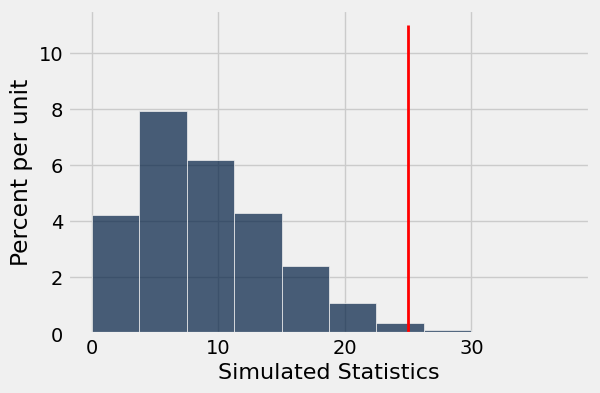

In [12]:
t = Table().with_column('Simulated Statistics', simulated_statistics)
t.hist()
plt.plot([observed_statistic, observed_statistic] , [0, 0.11], color='red', lw=2);

We can make a visual argument as to whether we believe the observed statistic is consistent with the researchers' model. Here, since larger values of the test statistic suggest the alternative model (where the chance that infants would choose the jar with the higher proportion of objects in their preferred color is something other than 50%), we can formalize our analysis by finding what proportion of simulated statistics were as large or larger than our observed test statistic (the area at or to the right of the observed test statistic). If this area is small enough, we’ll declare that the observed data are inconsistent with our simulated model.

**Question 9:** Calculate the proportion of simulated statistics greater than or equal to the observed statistic. 

<!--
BEGIN QUESTION
name: q1_9
-->

In [13]:
proportion_greater_or_equal = t.where("Simulated Statistics", are.above_or_equal_to(observed_statistic)).num_rows / t.num_rows
proportion_greater_or_equal

0.0199

By convention, we often compare the proportion we just calculated to 0.05. If the proportion of simulated statistics greater than or equal to the observed statistic is sufficiently small (less than or equal to 0.05), then this is evidence against researchers' model. Otherwise, we don’t have any reason to doubt the researchers' model. 

This should help you make your own conclusions about the experiment. 